# Assigment 4

In [45]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# constants
g = 9.81 #m/s^2, gravitational acceleration

## 1 Radioactive Decay

$$ \frac{dN}{dt}  =  -\lambda N$$
$$ N(t) = N_{0} e^{-\lambda t} $$

#### Simulating Decay

In [47]:
# initializing variables and list
N0 = 1000 #initial number of radioactive nuclei
N = N0 #updated number of radioactive nuclei
lam = 0.05 #min^-1 decay constant

t_max = 100 #min, final time
t, dt = 0, 1 #min, time and time step

decay_times = []
pop_sim = []

In [48]:
# simulating decay using Euler method
while t < t_max:
    decay_times.append(t)
    pop_sim.append(N)
    
    der_N = -lam*N
    N = N + der_N*dt
    t = t + dt


#### Comparing to Analytic Solution

In [49]:
# define analytic decay function
def analytic_decay(t):
    return N0*np.exp(-lam * t)

# assign analytic data to array
t_arr = np.array(decay_times)
N_arr = analytic_decay(t_arr)

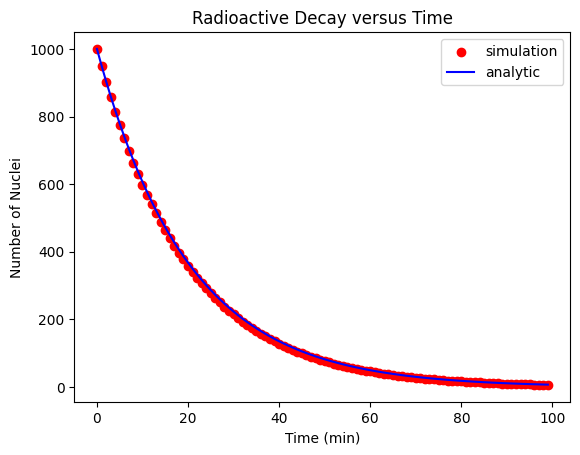

In [50]:
# plot simulation and analytic solution
plt.scatter(decay_times, pop_sim, color='red', label='simulation')
plt.plot(t_arr, N_arr, color='blue', label='analytic')
plt.title('Radioactive Decay versus Time')
plt.xlabel('Time (min)')
plt.ylabel('Number of Nuclei')
plt.legend()

##### Q1.2
The simulation increasingly underestimates the decay as time progresses.

#### Comparing Different Time Steps

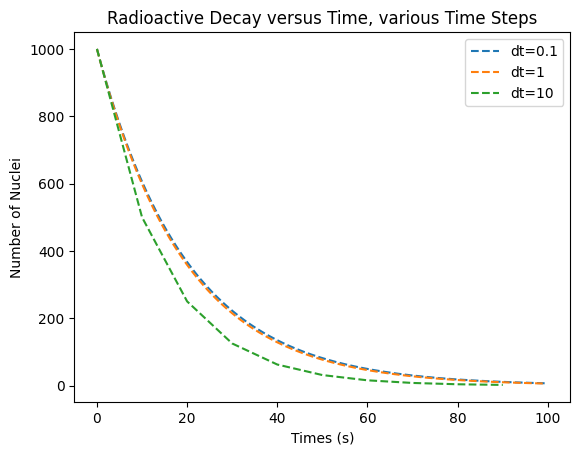

In [51]:
# storing given times steps 
decay_steps = [0.1, 1, 10]

# plotting decay with each time step
for i, step in enumerate(decay_steps):
    N = N0
    t, dt = 0, step
    
    decay_times = []
    pop_sim = []
    while t < t_max:
        decay_times.append(t)
        pop_sim.append(N)
    
        der_N = -lam*N
        N = N + der_N*dt
        t = t + dt
    plt.plot(decay_times, pop_sim, linestyle='dashed', label=f'dt={dt}')

# plot of analytic solution for comparison
#plt.plot(t_arr, N_arr, color='red', linestyle='dotted', label='analytic, dt=1')

# plot labels
plt.title('Radioactive Decay versus Time, various Time Steps')
plt.xlabel('Times (s)')
plt.ylabel('Number of Nuclei')
plt.legend()
plt.show()


##### Q1.3
As dt decreases, the simulation becomes more accurate. However, this method is only an approximation, so it will always deviate to degree no matter how small dt.

#### Simulating Decay with Production Source

$$ \frac{dN}{dt}  =  P - \lambda N$$

In [52]:
#initializing variables and list
P = 10 #nuclei/min, production rate
N0 = 1000 #initial number of radioactive nuclei
N = N0 #updated number of radioactive nuclei
lam = 0.05 #min^-1 decay constant

t_max = 200 #min, final time
t, dt = 0, 1 #min, time and time step

decay_times = []
pop_sim = []

Text(0, 0.5, 'Population')

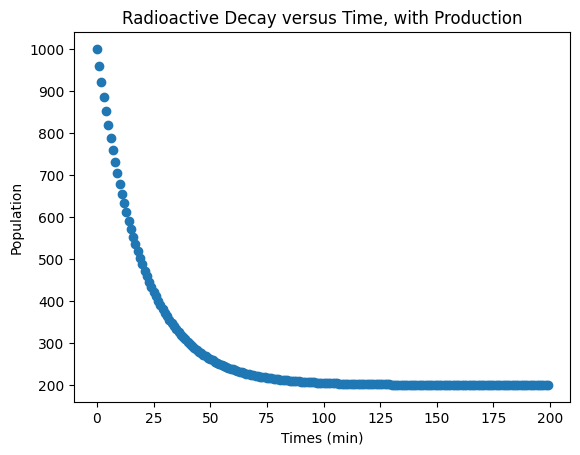

In [53]:
# simulating and plotting decay with production
while t < t_max:
    decay_times.append(t)
    pop_sim.append(N)
    
    der_N = (P - lam*N)
    N = N + der_N*dt
    t = t + dt

plt.scatter(decay_times, pop_sim)
plt.title('Radioactive Decay versus Time, with Production')
plt.xlabel('Times (min)')
plt.ylabel('Population')


##### Q1.4
The population does not go to zero, but instead approaches a limit of about 200 radioactive nuclei.

## 2 Projectile Motion in 2D 

$$\vec{F_{net}}  =  \vec{F}_{g} + \vec{F}_{\text{drag}}$$

$$\vec{F}_{g}  =  (-mg) \hat{j}$$

$$
\vec{F}_{\text{drag}} = (-b v_{x}) \hat{i} +  (-b v_{y}) \hat{j}
$$

$$
\vec{a}  = \left( -\frac{b}{m} v_{x} \right) \hat{i}  +  \left( -\frac{b}{m} v_{y} \right) \hat{j} 
$$

#### Simulating Projectile Motion in a Vacuum

In [54]:
# initializing variables and list
t, dt = 0, 0.1 #min, time and time step

t0 = math.pi/4 #(rad), initial angle
v0 = 50 #m/s, initial velocity
v0x = v0*math.cos(t0) #m/s, initial horizontal velocity
v0y = v0*math.sin(t0) #m/s, initial vertical velocity

x, y = 0, 0 #m, horizontal and vertical distance
vx, vy = v0x, v0y #m/s, updated velocity
ax, ay = 0, -g #m/s^2, acceleration

horztl_vac = []
vertcl_vac = []

Text(0, 0.5, 'Vertical Distance (m)')

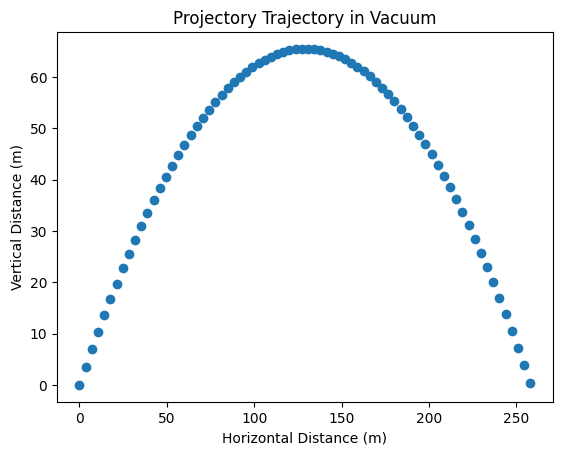

In [55]:
# simulating and plotting trajectory with Euler's method
while y > -1:
    horztl_vac.append(x)
    vertcl_vac.append(y)

    x = x + vx*dt

    y = y + vy*dt
    vy = vy + ay*dt

    t = t + dt

plt.scatter(horztl_vac, vertcl_vac)
plt.title('Projectory Trajectory in Vacuum')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')

Theoretical Range
$$
R = \frac{v^2 sin(2 \theta)}{g}
$$

In [56]:
# calculating theoretical range
R = (v0**2) * math.sin(2*t0)/g
print(R)

254.841997961264


##### Q2.1

The plot shows a range of around 260 meters, which slightly overestimates to the predicted range 254.84 meters by a difference of 5.16 meters.

#### Simulating Projectile Motion with Air Resistance

In [57]:
# initializing variables and list
b = 0.2 #min^-1, air resistance constant
m = 1 #kg, mass

t = 0 #min, time and time step

v0x = v0*math.cos(t0) #m/s, initial horizontal velocity
v0y = v0*math.sin(t0) #m/s, initial vertical velocity

x, y = 0, 0 #m, horizontal and vertical distance
vx, vy = v0x, v0y #m/s, updated velocity
ax, ay = -b*v0x/m, -(g + b*v0y/m) #m/s^2, acceleration

horztl_drag = []
vertcl_drag = []

In [58]:
# simulating trajectory with Euler-Cromer method
while y > -1:
    horztl_drag.append(x)
    vertcl_drag.append(y)
    
    vx = vx + ax*dt
    x = x + vx*dt
    
    vy = vy + ay*dt
    y = y + vy*dt
    
    t = t + dt

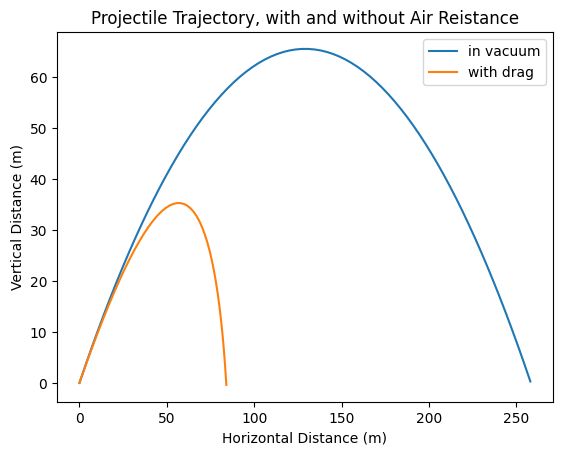

In [59]:
# plotting both trajectories
plt.plot(horztl_vac, vertcl_vac, label='in vacuum')
plt.plot(horztl_drag, vertcl_drag, label='with drag')
plt.title('Projectile Trajectory, with and without Air Reistance')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()

##### Q2.2
When air resistance is taken into account, the symmetric parabola, becomes an asymmetric wedge, skewed left.

#### Finding Optimal Angle

In [60]:
# initializing variables and list
t, dt = 0, 0.1 #min, time and time step

t0 = math.pi/4 #(rad), initial angle
v0 = 50 #m/s, initial velocity
v0x = v0*math.cos(t0) #m/s, initial horizontal velocity
v0y = v0*math.sin(t0) #m/s, initial vertical velocity

x, y = 0, 0 #m, horizontal and vertical distance
vx, vy = v0x, v0y #m/s, updated velocity
ax, ay = -b*v0x/m, -(g + b*v0y/m) #m/s^2, acceleration

horztl_drag = []
vertcl_drag = []

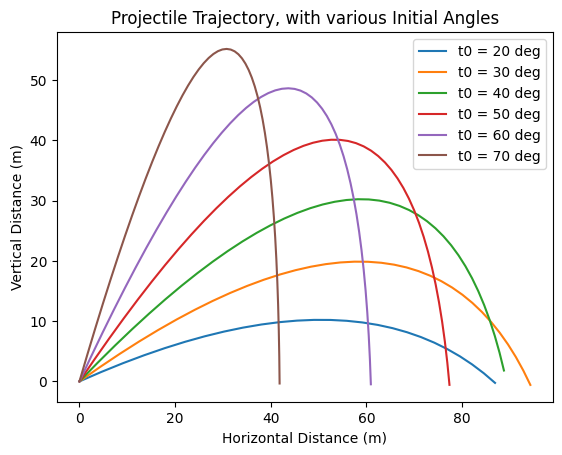

In [61]:
# storing various initial angles
deg_angle = [20, 30, 40, 50, 60, 70]

# plotting trajectories with different initial angles
for i, angle in enumerate(deg_angle):
    t = 0
    x, y = 0, 0

    t0 = angle * math.pi/180
    
    v0x = v0*math.cos(t0)
    v0y = v0*math.sin(t0)

    vx = v0x
    vy = v0y

    ax = -b*v0x/m
    ay = -(g + b*v0y/m)

    horztl_drag = []
    vertcl_drag = []

    while y > -1:
        horztl_drag.append(x)
        vertcl_drag.append(y)
        
        vx = vx + ax*dt
        x = x + vx*dt
        
        vy = vy + ay*dt
        y = y + vy*dt
        
        t = t + dt
    plt.plot(horztl_drag, vertcl_drag, label=f't0 = {angle} deg')

plt.title('Projectile Trajectory, with various Initial Angles')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()
plt.show()
        

##### Q2.3

An initial angle of 30 degrees results in the greatest horizontal range, at almost 90 meters.

## 3 Newton's Law of Cooling

$$
\frac{dT}{dt} = -K (T - T_{ \text{env} })
$$

####  Simulating Cooling using Euler Method

In [62]:
# initialize variables and list
K = 0.05 #min^-1, cooling constant
T0 = 90 #C, initial temperature of coffee
T = T0 #C, updated temperature of coffee
T_env = 20 #C, room temperature

t, dt = 0, 2 #min, time and time step
t_max = 60

cool_times = []
temps = []

Text(0, 0.5, 'Temperature (C)')

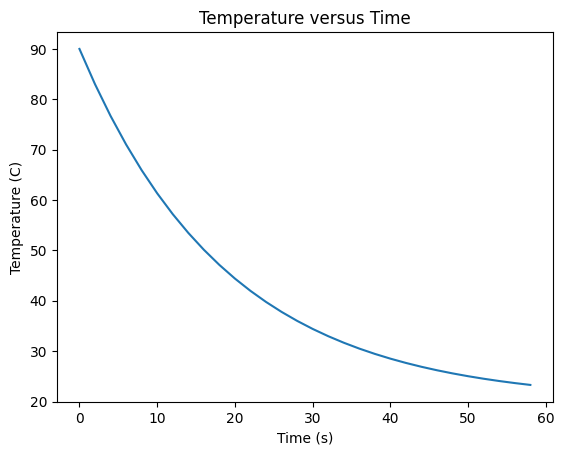

In [63]:
# simulating amd plotting cooling with Euler's method
while t < t_max:
    cool_times.append(t)
    temps.append(T)

    der_T = -K*(T - T_env)
    T = T + der_T*dt
    t = t + dt

plt.plot(cool_times, temps)
plt.title('Temperature versus Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')


#### Comparing to RK4 and Analytic Solution

In [64]:
t = 0
T = T0

# simulating cooling with Runge-Kutte method
def rk4_step(f, t, y, dt):
    k1 = f(t, y)
    k2 = f(t + 0.5*dt, y + 0.5*dt*k1)
    k3 = f(t + 0.5*dt, y + 0.5*dt*k2)
    k4 = f(t + dt, y + dt*k3)
    return y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def cooling_fun(t, state):
    T, T = state
    return np.array([T, -K*(T - T_env)])

t, state = 0, np.array([90, 90])
cooling_rk4 = []

while t < t_max:
    cooling_rk4.append([t, state[1]])
    state = rk4_step(cooling_fun, t, state, dt)
    t = t + dt

cooling_rk4 = np.array(cooling_rk4)

$$
T(t)  =  T_{\text{env}} + (T_{0} - T_{\text{env}}) e^{-Kt}
$$  

In [65]:
t = 0
T = T0

# define analytic cooling function
def analytic_cooling(t):
    return T_env + (T - T_env)*np.exp(-K*t)

# assign analytic data to array 
t_arr = np.array(cool_times)
T_arr = analytic_cooling(t_arr)

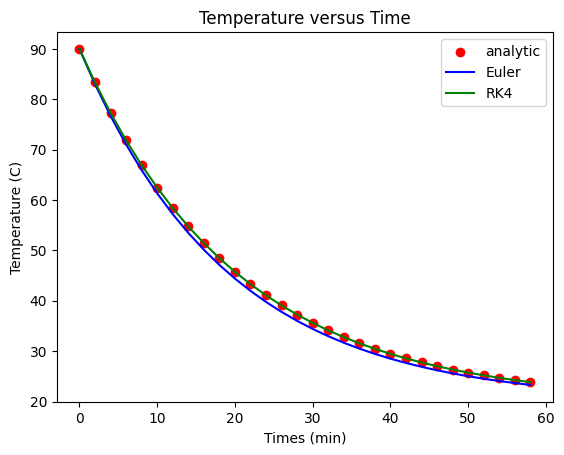

In [66]:
# plot Euler, RK4 and analytic solution
plt.scatter(t_arr, T_arr, color='red', label='analytic')
plt.plot(cool_times, temps, color='blue', label='Euler')
plt.plot(cooling_rk4[:,0], cooling_rk4[:,1], color='green', label='RK4')

plt.title('Temperature versus Time')
plt.xlabel('Times (min)')
plt.ylabel('Temperature (C)')
plt.legend()

##### Q3.3
1. The Runge-Kutta method better approximates the exact solution.
2. The Euler and Runge-Kutta method have no more than a one degree Celcius difference in the first 10 minutes.